In [1]:
#Load references for pandas and numpy
import pandas as pd
import numpy as np

#External reference used
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# https://pydotplus.readthedocs.io/reference.html
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [2]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Visualizing decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
#For displaying graph using matplotlib in jupyter notebook
%matplotlib inline

In [4]:
#Load data
from sklearn.datasets import load_wine

In [5]:
#Loading winedataset
wineDataObj = load_wine()

In [6]:
#Creating dataframe
wineDataFrame = pd.DataFrame(wineDataObj['data'],columns=wineDataObj['feature_names'])
#Assign variable data values in data
data = wineDataFrame
#Creating columns target in dataframe and copying values for this column from wine dataset
data['target'] = wineDataObj['target']
#Creating a column class and fill the values for this column by mapping values from target column from data frame to target_names
#Columns with dataset using map method
data['class'] = data['target'].map(lambda ind: wineDataObj['target_names'][ind])

In [7]:
#Displaying first five records of dataframe
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [8]:
#Displaying last five records of dataframe
data.tail(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2,class_2


In [9]:
#Print class names
wineDataObj['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
#Getting reference for model_selection library
from sklearn.model_selection import train_test_split

In [11]:
#Splitting dataset into 70% training and 30% testing
#including every column values except column named 'class' as we are going to predict the class of the objects using this column
X = data.drop('class',axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
#Loading reference for decision tree
from sklearn.tree import DecisionTreeClassifier

In [13]:
#Instantiate DecisionTree model with gini index as measuring the quality of split
decisionTree = DecisionTreeClassifier(criterion='gini')

In [14]:
#Fit training model
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#Get predictions by passing X_test values
dtree_predictions = decisionTree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
#Printing classification report and confusion matrix
print(confusion_matrix(y_test,dtree_predictions))
print("\n")
print(classification_report(y_test,dtree_predictions))

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        22
     class_2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [18]:
#Instantiate DecisionTree model with entropy as measuring the quality of split
decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy')

In [19]:
#Fit training model with training data set
decisionTreeEntropy.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
#Get predictions by passing X_test values
dtree_predictions = decisionTree.predict(X_test)

In [21]:
#Printing classification report and confusion matrix
print(confusion_matrix(y_test,dtree_predictions))
print("\n")
print(classification_report(y_test,dtree_predictions))

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        22
     class_2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [22]:
#Visualize Decision Tree

#Create StringIO object to read/write file contents as string
decision_Tree_Data = StringIO()

In [23]:
#Export decision tree in a DOT(graph description language) format
#Input:- decision tree model,output = StringIO object which stores decision tree contents as a String
export_graphviz(decisionTree,out_file=decision_Tree_Data,filled=True,rounded=True,special_characters=True)

In [24]:
#Load graph as defined in the DOT format and return a DOT class which represents a graph
decisionTreeGraph = pydotplus.graph_from_dot_data(decision_Tree_Data.getvalue())

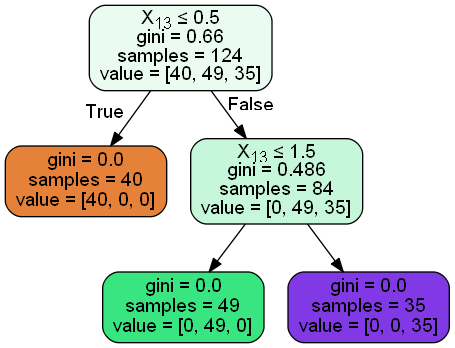

In [25]:
#create a png image with the graph contents stored in the DOT class object decisionTreeGraph
Image(decisionTreeGraph.create_png())

In [26]:
#Create StringIO object to read/write file contents as string
decision_tree_data_Entropy = StringIO()

In [ ]:
#Export decision tree in a DOT(graph description language) format
#Input:- decision tree model,output = StringIO object which stores decision tree contents as a String
export_graphviz(decisionTreeEntropy,out_file=decision_tree_data_Entropy,filled=True,rounded=True,special_characters=True)
